

# Project: Sentiment Analysis of Amazon Reviews 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Text Preprocessing</a></li>
<li><a href="#wordcloud">Creating a wordcloud to summarize the text</a></li>
<li><a href="#Sentiment">Sentiment score using vadersentiment</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~200,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

<a id='wrangling'></a>
## Data Wrangling


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("Reviews.csv")

In [3]:
# Getting information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
# Check how many rows and columns we have

df.shape

(568454, 10)

In [5]:
# Check for missing values

df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
# Ceheck for duplicated values

df.duplicated().sum()

0

### Data Cleaning


In [7]:
# Now we will drop missing values

df = df.dropna()

In [8]:
######

<a id='eda'></a>
## Text Preprocessing

In [9]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

### Converting upper case to lower case

In [10]:
df["Text"] = df["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Removing punctuations 

In [11]:
df["Text"] = df["Text"]. str.replace("[^\w\s]", "")

df["Text"].head()

C:\Users\User\AppData\Local\Temp\ipykernel_7164\4284697037.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Text"] = df["Text"]. str.replace("[^\w\s]", "")


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

### Remove stop words

In [12]:
stop = stopwords.words("english")

df["Text"] = df["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop ))

df["Text"].head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

### Lemmatization

In [13]:
#python -m textblob.download_corpora


df["Text"] = df["Text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split() ]))

df["Text"].head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

<a id='wordcloud'></a>
## Creating a wordcloud to summarize the text

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [15]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

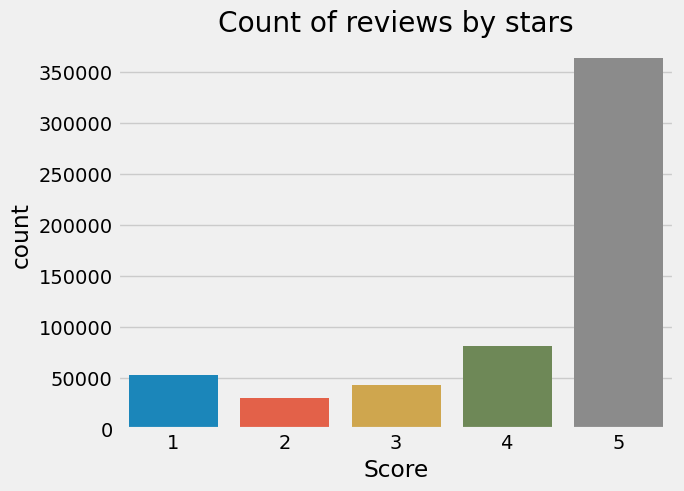

In [16]:
sns.countplot(x = "Score", data=df)
plt.title("Count of reviews by stars");

In [17]:
rev_data = df


score_1 = rev_data[rev_data["Score"] == 1]
score_2 = rev_data[rev_data["Score"] == 2]
score_3 = rev_data[rev_data["Score"] == 3]
score_4 = rev_data[rev_data["Score"] == 4]
score_5 = rev_data[rev_data["Score"] == 5]

In [18]:
rev_sample = pd.concat([score_1,score_2,score_3,score_4,score_5], axis=0)

rev_sample.reset_index(drop=True, inplace=True)

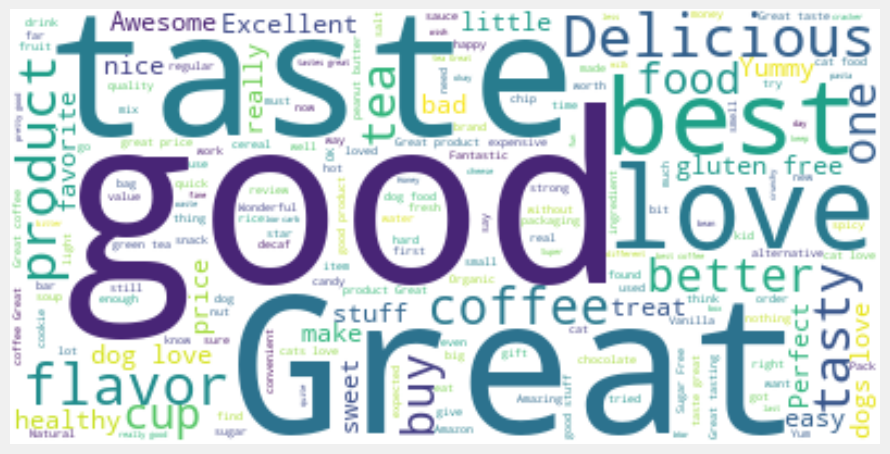

In [19]:
rev_str = rev_sample.Summary.str.cat()

wordcloud_1 = WordCloud(background_color="white").generate(rev_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.show()

### Creating a wordcloud for positive and negative reviews

In [20]:
neg_rev = rev_sample[rev_sample["Score"].isin([1,2])]
pos_rev = rev_sample[rev_sample["Score"].isin([4,5])]

# Transforming to single string
neg_rev_str = neg_rev.Summary.str.cat()
pos_rev_str = pos_rev.Summary.str.cat()


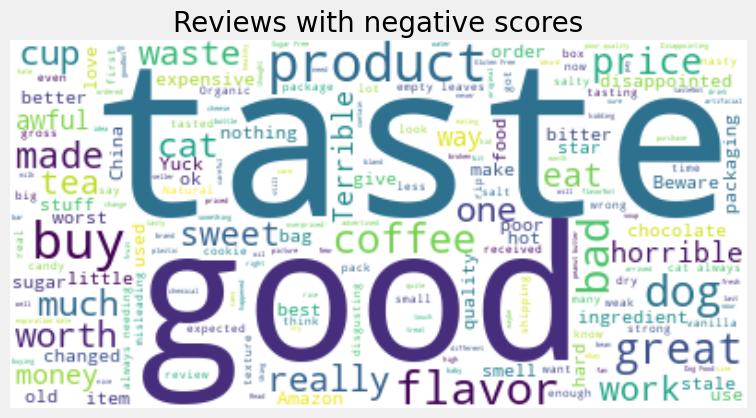

In [21]:
neg_wordcloud = WordCloud(background_color="white").generate(neg_rev_str)
pos_wordcloud = WordCloud(background_color="black").generate(pos_rev_str)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(neg_wordcloud, interpolation="bilinear")
ax1.axis("off")
ax1.set_title("Reviews with negative scores", fontsize=20);

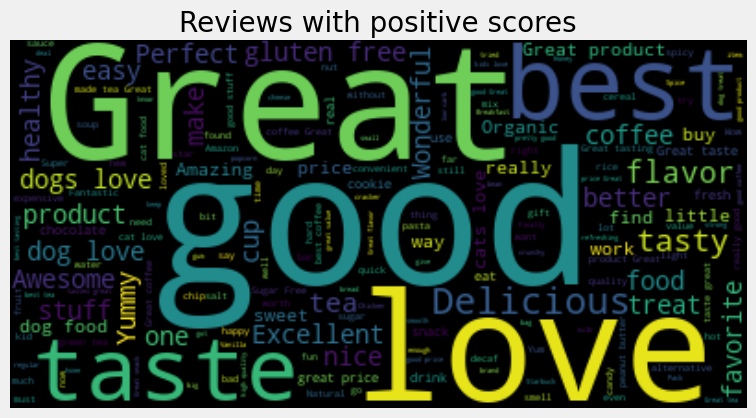

In [22]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(pos_wordcloud, interpolation="bilinear")
ax2.axis("off")
ax2.set_title("Reviews with positive scores", fontsize=20);

<a id='Sentiment'></a>
## Sentiment score using vadersentiment

Here we will use a pretrained model to implement sentiment analysis

In [23]:
# Importing more libraries

import re 
import os
import sys
import ast

In [24]:
# Now we will create a function to get the sentiment

cp = sns.color_palette()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [25]:
# Now generating a sentiment for every row in the data 

emp_line = []

for row in df["Text"]:
    vs = analyzer.polarity_scores(row)
    emp_line.append(vs)
    
# Creat a new dataframe for the sentiment

sen_df = pd.DataFrame(emp_line)
sen_df.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


In [26]:
# Now we will join the sentiment dataframe with the orignal dataframe

new_df = pd.concat([df.reset_index(drop=True), sen_df], axis=1)

new_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468


In [27]:
new_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'neg',
       'neu', 'pos', 'compound'],
      dtype='object')

In [28]:
# Now we will use a threshold to conver the scores into positve or negative:

new_df["Sentiment"] = np.where(new_df["compound"] >= 0 , "Positive","Negative")

new_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,Positive


### Result

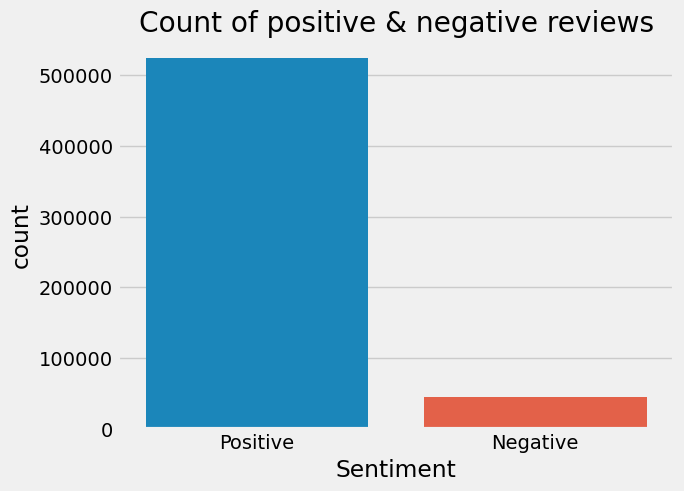

In [29]:
sns.countplot(x="Sentiment", data=new_df)
plt.title("Count of positive & negative reviews");